In [44]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from scipy.stats import pearsonr
import random

In [45]:
# 获取特征和目标变量
def get_xy(data,ymark):

    X = data.iloc[:, data.columns.get_loc('A8m_R'):]

    y = data[ymark]
    return X, y

LinearRegression

In [73]:
def linear_regression_cv(X, y, n_splits=2, n_runs=101):
    all_r_scores = []
    for _ in range(n_runs):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=None)
        r_scores = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # 训练模型
            model = LinearRegression()
            model.fit(X_train, y_train)

            # 预测
            y_pred = model.predict(X_test)

            # 计算皮尔逊相关系数
            r, _ = pearsonr(y_test, y_pred)
            r_scores.append(r)

        all_r_scores.append(np.mean(r_scores))
    return all_r_scores
def permutation_test(X, y, res, n_permutations=1000):

    # 存储置换后的r值
    permutation_r_values = []

    for _ in range(n_permutations):
        # 随机打乱目标变量 y
        y_permuted = y.sample(frac=1).reset_index(drop=True)

        # 对置换数据进行一次交叉验证
        permuted_r = linear_regression_cv(X, y_permuted, n_runs=1)
        permutation_r_values.append(permuted_r)

    # 计算p值：原始r值大于等于置换r值的比例
    p_value = np.mean(np.array(permutation_r_values) >= res)

    return p_value
file_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/subtype1_GrayVol246_Z_AllMDD_HAMD_24w.csv'
data = pd.read_csv(file_path)
X, y = get_xy(data,'response')

print('SHAPE:',X.shape, y.shape)
all_r_scores = linear_regression_cv(X, y)

res = np.median(all_r_scores)
print(res)
pvalue = permutation_test(X, y, res)
print('pvalue:', pvalue)

getxy: (70, 246)
SHAPE: (70, 246) (70,)
0.04956882253880078
pvalue: 0.37


SVR

In [84]:
from sklearn.svm import LinearSVR

def SVR(X, y, n_splits=5, n_runs=101):
    all_r_scores = []
    for i in range(n_runs):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=None)
        r_scores = []
        k = 0
        for train_index, test_index in kf.split(X):
            k = k+1
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # 训练模型
            model = LinearSVR()
            model.fit(X_train, y_train)

            # 预测
            y_pred = model.predict(X_test)

            data = np.column_stack((y_pred, y_test))
            weight = model.coef_

            # 保存预测结果和权重
            # np.savetxt('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Predict/SVR_subtype1_12w/''pre_'+str(i)+'_'+str(k)+'.csv', data, delimiter=',', header='y_pred,y_test', comments='')
            # np.savetxt('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Predict/SVR_subtype1_12w/''weight_'+str(i)+'_'+str(k)+'.csv', weight, delimiter=',', header='weight', comments='')

            # 计算皮尔逊相关系数
            r, _ = pearsonr(y_test, y_pred)
            r_scores.append(r)

        all_r_scores.append(np.mean(r_scores))
    return all_r_scores
def SVRpermutation_test(X, y, res, n_permutations=1000):

    # 存储置换后的r值
    permutation_r_values = []

    for _ in range(n_permutations):
        # 随机打乱目标变量 y
        y_permuted = y.sample(frac=1).reset_index(drop=True)

        # 对置换数据进行一次交叉验证
        permuted_r = SVR(X, y_permuted, n_runs=1)
        permutation_r_values.append(permuted_r)

    # 计算p值：原始r值大于等于置换r值的比例
    p_value = np.mean(np.array(permutation_r_values) >= res)

    return p_value

file_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/subtype2_GrayVol246_Z_AllMDD_HAMD_52w.csv'
data = pd.read_csv(file_path)
X, y = get_xy(data,'response')
print('SHAPE:',X.shape, y.shape)
all_r_scores = SVR(X, y)
#np.savetxt('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Predict/SVR_subtype1_12w/rvalue.csv', all_r_scores, delimiter=',',  comments='')

res = np.median(all_r_scores)
index = all_r_scores.index(res)
print('index:',index)

print('r-value:',res)
pvalue = SVRpermutation_test(X, y, res)
print('permutation-pvalue:', pvalue)

getxy: (27, 246)
SHAPE: (27, 246) (27,)
index: 66
r-value: 0.024161976546224834
permutation-pvalue: 0.48


Ridge

In [31]:
from sklearn.linear_model import Ridge

def RidgeModel(X, y, n_splits=5, n_runs=101):
    all_r_scores = []
    for _ in range(n_runs):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=None)
        r_scores = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # 训练模型
            model = Ridge()
            model.fit(X_train, y_train)

            # 预测
            y_pred = model.predict(X_test)

            # 计算皮尔逊相关系数
            r, _ = pearsonr(y_test, y_pred)
            r_scores.append(r)

        all_r_scores.append(np.mean(r_scores))
    return all_r_scores

def Ridgepermutation_test(X, y, res, n_permutations=1000):

    # 存储置换后的r值
    permutation_r_values = []

    for i in range(n_permutations):

        # 随机打乱目标变量 y
        y_permuted = y.sample(frac=1).reset_index(drop=True)

        # 对置换数据进行一次交叉验证
        permuted_r = RidgeModel(X, y_permuted, n_runs=1)
        permutation_r_values.append(permuted_r)

    # 计算p值：原始r值大于等于置换r值的比例
    p_value = np.mean(np.array(permutation_r_values) >= res)

    return p_value

file_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/subtype2_GrayVol246_Z_AllMDD_HAMD_12w.csv'
data = pd.read_csv(file_path)
X, y = get_xy(data,'response')
print('SHAPE:',X.shape, y.shape)
all_r_scores = RidgeModel(X, y)
res = np.median(all_r_scores)
print('r-value:',res)
pvalue = Ridgepermutation_test(X, y, res)
print('pvalue:', pvalue)

r-value: -0.39261150723398813
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269


PLSR

In [34]:
from sklearn.cross_decomposition import PLSRegression
import pandas as pd
def PLSRModel(X, y, n_splits=10, n_runs=101):
    all_r_scores = []
    for _ in range(n_runs):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=None)
        r_scores = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # 训练模型
            model = PLSRegression(n_components=10)
            model.fit(X_train, y_train)

            # 预测
            y_pred = model.predict(X_test)

            # 计算皮尔逊相关系数
            r, _ = pearsonr(y_test, y_pred)
            r_scores.append(r)

        all_r_scores.append(np.mean(r_scores))
    return all_r_scores

def PLSRpermutation_test(X, y, res, n_permutations=1000):

    # 存储置换后的r值
    permutation_r_values = []

    for i in range(n_permutations):

        # 随机打乱目标变量 y
        y_permuted = y.sample(frac=1).reset_index(drop=True)

        # 对置换数据进行一次交叉验证
        permuted_r = PLSRModel(X, y_permuted, n_runs=1)
        permutation_r_values.append(permuted_r)

    # 计算p值：原始r值大于等于置换r值的比例
    p_value = np.mean(np.array(permutation_r_values) >= res)

    return p_value

file_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/subtype2_GrayVol246_Z_AllMDD_HAMD_12w.csv'
data = pd.read_csv(file_path)
X, y = get_xy(data,'response')
print('SHAPE:',X.shape, y.shape)
all_r_scores = PLSRModel(X, y)
res = np.median(all_r_scores)
print('r-value:',res)
pvalue = PLSRpermutation_test(X, y, res)
print('pvalue:', pvalue)

/var/folders/dh/dmftg40j21j249nqf2z5v2nh0000gn/T/ipykernel_33023/2999586650.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_test, y_pred)
/var/folders/dh/dmftg40j21j249nqf2z5v2nh0000gn/T/ipykernel_33023/2999586650.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_test, y_pred)


r-value: nan


/var/folders/dh/dmftg40j21j249nqf2z5v2nh0000gn/T/ipykernel_33023/2999586650.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_test, y_pred)
/var/folders/dh/dmftg40j21j249nqf2z5v2nh0000gn/T/ipykernel_33023/2999586650.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_test, y_pred)
/var/folders/dh/dmftg40j21j249nqf2z5v2nh0000gn/T/ipykernel_33023/2999586650.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_test, y_pred)
/var/folders/dh/dmftg40j21j249nqf2z5v2nh0000gn/T/ipykernel_33023/2999586650.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = pearsonr(y_test, y_pred)
/var/folders/dh/dmftg40j21j249nqf2z5v2nh0000gn/T/ipykernel_33023/2999586650.py:20: ConstantInputWarning: An input array is constant; the correlation coeffic

pvalue: 0.0


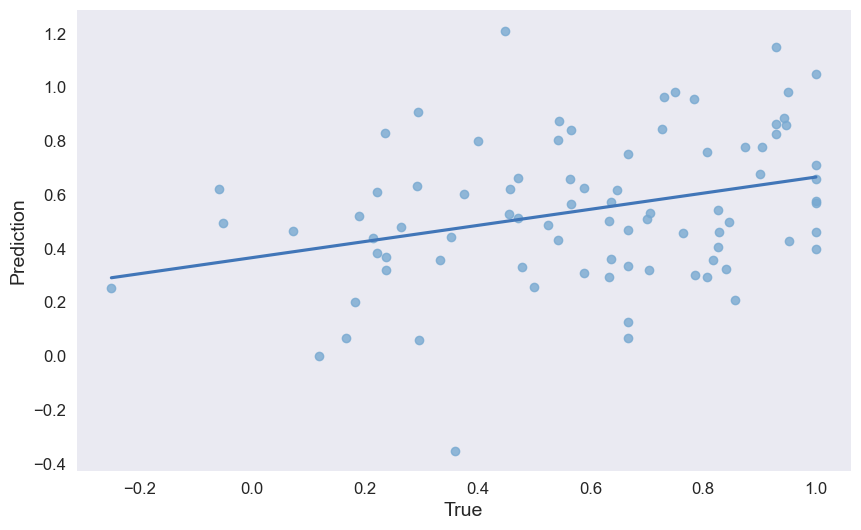

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取CSV文件
data_subtype1 = pd.read_csv('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Predict/SVR_Resp/aRes_10k_index31.csv')
data_subtype2 = pd.read_csv('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Predict/SVR_Resp/aRes_10k_index31.csv')
y = np.array(data_subtype1['y_pred'])
x = np.array(data_subtype2['y_test'])
# 创建一个图和两个轴对象
fig, ax = plt.subplots(figsize=(10, 6))

# 在第一个轴上绘制第一个数据集的散点回归图
sns.regplot(x=x, y=y,  ax=ax, scatter_kws={'color': '#78A9D1'}, line_kws={'color': '#4176B8'}, ci=None)  #


# 设置图表标题和坐标轴标签
#ax.set_title('Scatter Regression Plot of Age vs Outliers Counts')
ax.set_xlabel('True', size=14)
ax.set_ylabel('Prediction', size=14)

# 自定义x轴和y轴的刻度

#ax.set_xticks([-12, -8, -4,  0, 4, 8])  # 注意这里是set_xticks，因为你想要设置的是x轴的刻度
#ax.set_yticks([10,  30,  50,  70])
# 自定义x轴和y轴的线条粗细
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

# 去掉x轴和y轴上的小刻度线
ax.tick_params(axis='both', which='both', labelsize=12, bottom=False, top=False, left=False, right=False)
ax.grid(False)
# 去掉上边线和右边线
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Predict/SVR_Resp.png',dpi=300)
# 显示图表
plt.show()

In [8]:
from sklearn.svm import LinearSVR

def SVR(X, y, n_splits=10, n_runs=101):
    all_r_scores = []
    for i in range(n_runs):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=None)
        r_scores = []
        k = 0
        for train_index, test_index in kf.split(X):
            k = k+1
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # 训练模型
            model = LinearSVR()
            model.fit(X_train, y_train)

            # 预测
            y_pred = model.predict(X_test)

            data = np.column_stack((y_pred, y_test))
            weight = model.coef_


            # np.savetxt('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Predict/SVR_Resp/''pre_'+str(i)+'_'+str(k)+'.csv', data, delimiter=',', header='y_pred,y_test', comments='')
            # np.savetxt('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/Predict/SVR_Resp/''weight_'+str(i)+'_'+str(k)+'.csv', weight, delimiter=',', header='weight', comments='')

            # 计算皮尔逊相关系数
            r, _ = pearsonr(y_test, y_pred)
            r_scores.append(r)

        all_r_scores.append(np.mean(r_scores))
    return all_r_scores
def SVRpermutation_test(X, y, res, n_permutations=1000):

    # 存储置换后的r值
    permutation_r_values = []

    for _ in range(n_permutations):
        # 随机打乱目标变量 y
        y_permuted = y.sample(frac=1).reset_index(drop=True)

        # 对置换数据进行一次交叉验证
        permuted_r = SVR(X, y_permuted, n_runs=1)
        permutation_r_values.append(permuted_r)

    # 计算p值：原始r值大于等于置换r值的比例
    p_value = np.mean(np.array(permutation_r_values) >= res)

    return p_value

file_path = '/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1228/StaResults_test/Longitudinal/subtype1_GrayVol246_Z_AllMDD_HAMD_2w.csv'
data = pd.read_csv(file_path)
X, y = get_xy(data,'respone')

all_r_scores = SVR(X, y)
# np.savetxt('/Volumes/QCI/NormativeModel/Results/Result_GrayVol246_HBR_HCMDD_1129/StaResults/Longitudinal/Predict/SVR_Resp/rvalue.csv', all_r_scores, delimiter=',',  comments='')

res = np.median(all_r_scores)
index = all_r_scores.index(res)
print('index:',index)

print('r-value:',res)
pvalue = SVRpermutation_test(X, y, res)
print('permutation-pvalue:', pvalue)

index: 96
r-value: -0.028884322678710005
permutation-pvalue: 0.552
